## Classification Model for the Chemical Components of Red Wine

DSCI-100 - 005   
Group - 1:

Kritika Kajaria     
Bohan Li   
Andy Lu   
Marcin Tkacz  


## Introduction:

Antinori, an esteemed and historic winery in the heart of Italy’s Tuscany region, is renowned for its exceptional red wines. The winery’s pursuit of excellence mirrors the global trends observed in the wine industry, where the demand for high-quality red wines has seen a notable surge (Market Reports World, 2023). 
Utilizing datasets like the “Red Wine Quality” dataset from the UC Irvine Machine Learning Repository, which includes variables such as acidity, sugar content, and alcohol level, researchers and winemakers are turning to scientific methods to predict and ensure the quality of their wines. This dataset includes 1599 rows with no missing values. The variables included are quantitative with the exception to quality being categorical.
 In the case of Antinori, the focus is on red wines, primarily made from Sangiovese and other grape varieties. Antinori’s wines have distinct physicochemical profiles that contribute to their quality. The dataset’s attributes such as volatile acidity, citric acid, residual sugar, density, and quality variables could be adapted to reflect the unique characteristics of Antinori’s red wines. By cleaning and preprocessing a dataset tailored to red wines, a k-nearest-neighbor classification model could be implemented for wine quality predictions.
ns.
ons.


#### Predictive Question:  
How can we predict the quality of red wines using their physicochemical attributes?

In [6]:
### Run this cell before continuing.
set.seed(2934)
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)




In [2]:
# url and raw version of our dataset
red_wine_url <- "https://raw.githubusercontent.com/Marcin-tk/dsci-100-2023-w2-group-001/main/winequality-red.csv"
download.file(red_wine_url, "winequality-red.csv")

In [3]:
#tuning our data sets
red_wine_data_raw <- read_delim("winequality-red.csv")

red_wine_data <- red_wine_data_raw |>
    clean_names() |>
    map_df(as.numeric) |>
    mutate(quality = as_factor(quality))


        

red_wine_select <-red_wine_data|>
    select (quality, volatile_acidity, fixed_acidity, chlorides, 
            free_sulfur_dioxide, total_sulfur_dioxide, citric_acid, 
            alcohol, p_h, residual_sugar, density, sulphates)
redwine_split <- initial_split(red_wine_data, prop = 0.75, strata = quality)
redwine_train <- training(redwine_split)
redwine_test <- testing(redwine_split)

summary_red_wine_training <- redwine_train |>
        group_by(quality)|>
        summarize(mean_volatile_acidity = mean(volatile_acidity),
                  mean_fixed_acidity = mean(fixed_acidity),
                  mean_chlorides = mean(chlorides),
                  mean_free_sulfur_dioxide = mean(free_sulfur_dioxide),
                  mean_total_sulfur_dioxide = mean(total_sulfur_dioxide),
                 mean_citric_acid = mean(citric_acid) ,
                 mean_residual_sugar = mean(residual_sugar) ,
                  mean_ph = mean(p_h) ,
                  mean_alcohol = mean(alcohol) ,
                 mean_density = mean(density) ,
                 mean_sulphates = mean(sulphates),
                 total_count = n())
summary_red_wine_training

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


quality,mean_volatile_acidity,mean_fixed_acidity,mean_chlorides,mean_free_sulfur_dioxide,mean_total_sulfur_dioxide,mean_citric_acid,mean_residual_sugar,mean_ph,mean_alcohol,mean_density,mean_sulphates,total_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.9087500,8.762500,0.11000000,11.00000,26.00000,0.2112500,2.918750,3.388750,9.975000,0.9979912,0.5700000,8
4,0.6867949,7.817949,0.08092308,12.12821,36.46154,0.1794872,2.828205,3.382051,10.353846,0.9963595,0.5853846,39
5,0.5803039,8.156471,0.09376078,17.19804,57.87843,0.2427255,2.538627,3.303529,9.900588,0.9971024,0.6279412,510
6,0.5004622,8.296429,0.08463445,15.63866,40.84244,0.2700000,2.413445,3.325483,10.657773,0.9965545,0.6700420,476
7,0.3985667,8.876667,0.07705333,13.83000,33.14000,0.3715333,2.725667,3.292733,11.441667,0.9961711,0.7496667,150
8,0.4220000,8.433333,0.06766667,14.60000,36.86667,0.3780000,2.633333,3.283333,12.073333,0.9953100,0.7840000,15


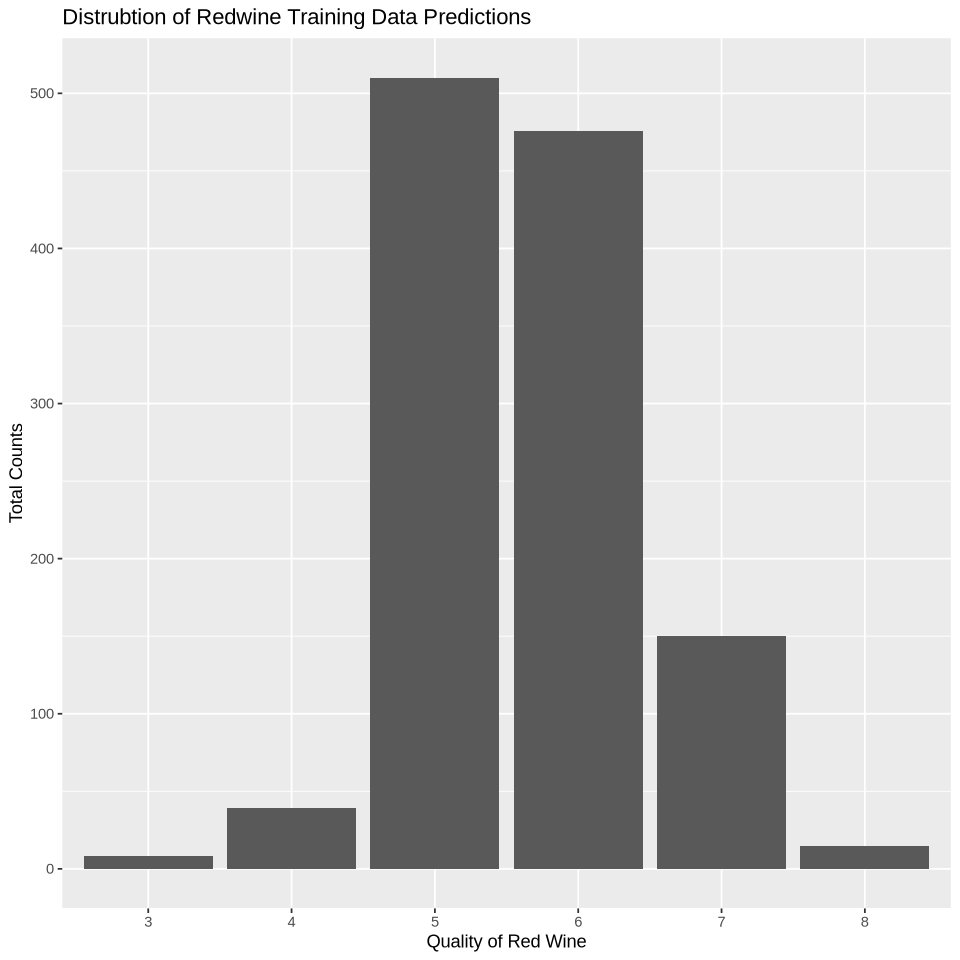

In [5]:
options(repr.plot.width=8, repr.plot.height = 8)

red_wine_train_plot <- summary_red_wine_training |>
    ggplot(aes(x = quality, y = total_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Quality of Red Wine", y = "Total Counts",
         title = "Distrubtion of Redwine Training Data Predictions")

red_wine_train_plot

        

# Methods:

We began by predicting wine quality using a scale of [1 - 10] with 1 being a low quality and 10 being of high quality, based on selected attributes, Fixed Acidity, Volatile Acidity, Citric acid, residual sugar, density, sulphates, chlorides, pH, alcohol, free sulfur and total sulfur dioxide along with quality. The dataset was partitioned into a training set and a test set to facilitate model training and evaluation. 
In our further testing model evaluation, we will use forward selection to add one predictor variable at a time to our model. We will start with our model having no predictors, then we will repeat the process of adding a unused predictor to the model, tuning all of our candidate models and updating the model to be the candidate model with the highest cross validation accuracy. In the end we want to select the model that gives us simplicity but provides high accuracy.

# Expected Outcomes and significance

Our objective is to create a model that can predict red wine quality with a reasonably dependable accuracy. This would give us more insight into what chemical component has the most significant role to influencing the quality of red wine. 
Such findings would be particularly beneficial to the wine industry to provide an competitive edge to their product against other competitors. Furthermore, to consumers as having such knowledge can help with their purchases and understanding if their wine is of higher quality or not.
We can also consider other factors that affect the wine quality that we were not added into our model. For example, the research leads to another interesting question about if the wine glass influences the wine quality, does temperature or structure of the wine glass affect the quality? External factors such as terrain, and time of the year the grape is grown is also potential factors to consider for future studies.
?
